In [1]:
# function --> class --> module --> package

import requests

In [2]:
response = requests.get('https://naver.com')

In [3]:
html = response.text


<!doctype html>                 <html lang="ko" data-dark="false"> <head> <meta charset="utf-8"> <title>NAVER</title> <meta http-equiv="X-UA-Compatible" content="IE=edge"> <meta name="viewport" content="width=1190"> <meta name="apple-mobile-web-app-title" content="NAVER"/> <meta name="robots" content="index,nofollow"/> <meta name="description" content="네이버 메인에서 다양한 정보와 유용한 컨텐츠를 만나 보세요"/> <meta property="og:title" content="네이버"> <meta property="og:url" content="https://www.naver.com/"> <meta property="og:image" content="https://s.pstatic.net/static/www/mobile/edit/2016/0705/mobile_212852414260.png"> <meta property="og:description" content="네이버 메인에서 다양한 정보와 유용한 컨텐츠를 만나 보세요"/> <meta name="twitter:card" content="summary"> <meta name="twitter:title" content=""> <meta name="twitter:url" content="https://www.naver.com/"> <meta name="twitter:image" content="https://s.pstatic.net/static/www/mobile/edit/2016/0705/mobile_212852414260.png"> <meta name="twitter:description" content="네이버 메인에서 다양한 정
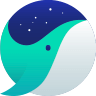
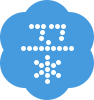

In [4]:
print(html)

In [5]:
# https://daegu0001.cognitiveservices.azure.com/

In [6]:
import matplotlib.pyplot as plt

In [7]:
from PIL import Image

In [8]:
from io import BytesIO

In [9]:
import json

In [10]:
subscription_key = 'subscription_key'

In [11]:
vision_base_url = 'https://daegu0001.cognitiveservices.azure.com/vision/v2.0/'

In [12]:
analyze_url = vision_base_url + 'analyze'

In [13]:
image_url = "https://upload.wikimedia.org/wikipedia/commons/thumb/1/12/" + \
"Broadway_and_Times_Square_by_night.jpg/450px-Broadway_and_Times_Square_by_night.jpg"

In [14]:
image = Image.open(BytesIO(requests.get(image_url).content))

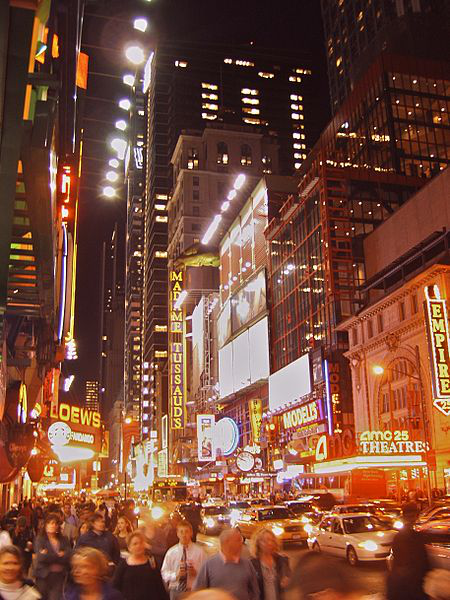

In [15]:
image

## 헤더 정보를 세팅합니다.

In [16]:
headers = { 'Ocp-Apim-Subscription-Key': subscription_key }
params = { 'visualFeatures': 'Categories,Description,Color' }
data = { 'url': image_url }

In [17]:
response = requests.post(analyze_url, headers=headers, params=params, json=data)

In [18]:
response

<Response [200]>

In [19]:
analysis = response.json()

In [20]:
analysis

{'categories': [{'name': 'outdoor_',
   'score': 0.00390625,
   'detail': {'landmarks': []}},
  {'name': 'outdoor_street',
   'score': 0.33984375,
   'detail': {'landmarks': []}}],
 'color': {'dominantColorForeground': 'Brown',
  'dominantColorBackground': 'Brown',
  'dominantColors': ['Brown'],
  'accentColor': 'B54316',
  'isBwImg': False,
  'isBWImg': False},
 'description': {'tags': ['building',
   'outdoor',
   'street',
   'city',
   'people',
   'large',
   'busy',
   'many',
   'table',
   'filled',
   'group',
   'night',
   'walking',
   'traffic',
   'bunch',
   'standing',
   'light',
   'crowded',
   'man',
   'ride',
   'crowd',
   'sign',
   'tall',
   'riding',
   'umbrella',
   'bus'],
  'captions': [{'text': 'a group of people on a city street at night',
    'confidence': 0.8928721606523157}]},
 'requestId': '9433ff57-016f-49cc-84b7-30b1434d94d7',
 'metadata': {'height': 600, 'width': 450, 'format': 'Jpeg'}}

In [21]:
image_caption = analysis['description']['captions'][0]['text']

In [22]:
image_caption

'a group of people on a city street at night'

# Object Detection

In [23]:
objectDetection_url = vision_base_url + 'detect'

In [24]:
image_url='https://static01.nyt.com/images/2019/10/03/nyregion/03nytoday1/merlin_162008868_5a82355f-1be5-4ddb-b562-a6cd7b776a43-superJumbo.jpg?quality=90&auto=webp'

In [25]:
image = Image.open(BytesIO(requests.get(image_url).content))

In [27]:
headers = {'Ocp-Apim-Subscription-Key': subscription_key}
data = {'url': image_url}

In [28]:
response = requests.post(objectDetection_url, headers=headers, json=data)

In [29]:
detectionResult = response.json()

In [30]:
detectionResult

{'objects': [{'rectangle': {'x': 1370, 'y': 570, 'w': 245, 'h': 166},
   'object': 'car',
   'confidence': 0.695,
   'parent': {'object': 'Land vehicle',
    'confidence': 0.745,
    'parent': {'object': 'Vehicle', 'confidence': 0.746}}},
  {'rectangle': {'x': 1617, 'y': 569, 'w': 228, 'h': 128},
   'object': 'car',
   'confidence': 0.685,
   'parent': {'object': 'Land vehicle',
    'confidence': 0.742,
    'parent': {'object': 'Vehicle', 'confidence': 0.742}}},
  {'rectangle': {'x': 151, 'y': 540, 'w': 156, 'h': 526},
   'object': 'person',
   'confidence': 0.762},
  {'rectangle': {'x': 751, 'y': 549, 'w': 202, 'h': 565},
   'object': 'person',
   'confidence': 0.812},
  {'rectangle': {'x': 343, 'y': 522, 'w': 211, 'h': 754},
   'object': 'person',
   'confidence': 0.77},
  {'rectangle': {'x': 384, 'y': 518, 'w': 432, 'h': 809},
   'object': 'person',
   'confidence': 0.829},
  {'rectangle': {'x': 1144, 'y': 491, 'w': 291, 'h': 806},
   'object': 'person',
   'confidence': 0.917}],
 '

In [31]:
from PIL import Image, ImageDraw, ImageFont

In [32]:
draw = ImageDraw.Draw(image)

In [33]:
def CreateImage(detectionResult):
    objects = detectionResult['objects']
    
    for obj in objects:
        rect = obj['rectangle']
        
        x = rect['x']
        y = rect['y']
        w = rect['w']
        h = rect['h']
        
        draw.rectangle(((x,y), (x+w,y+h)), outline='red', width=3)
    return draw

In [34]:
result = CreateImage(detectionResult)

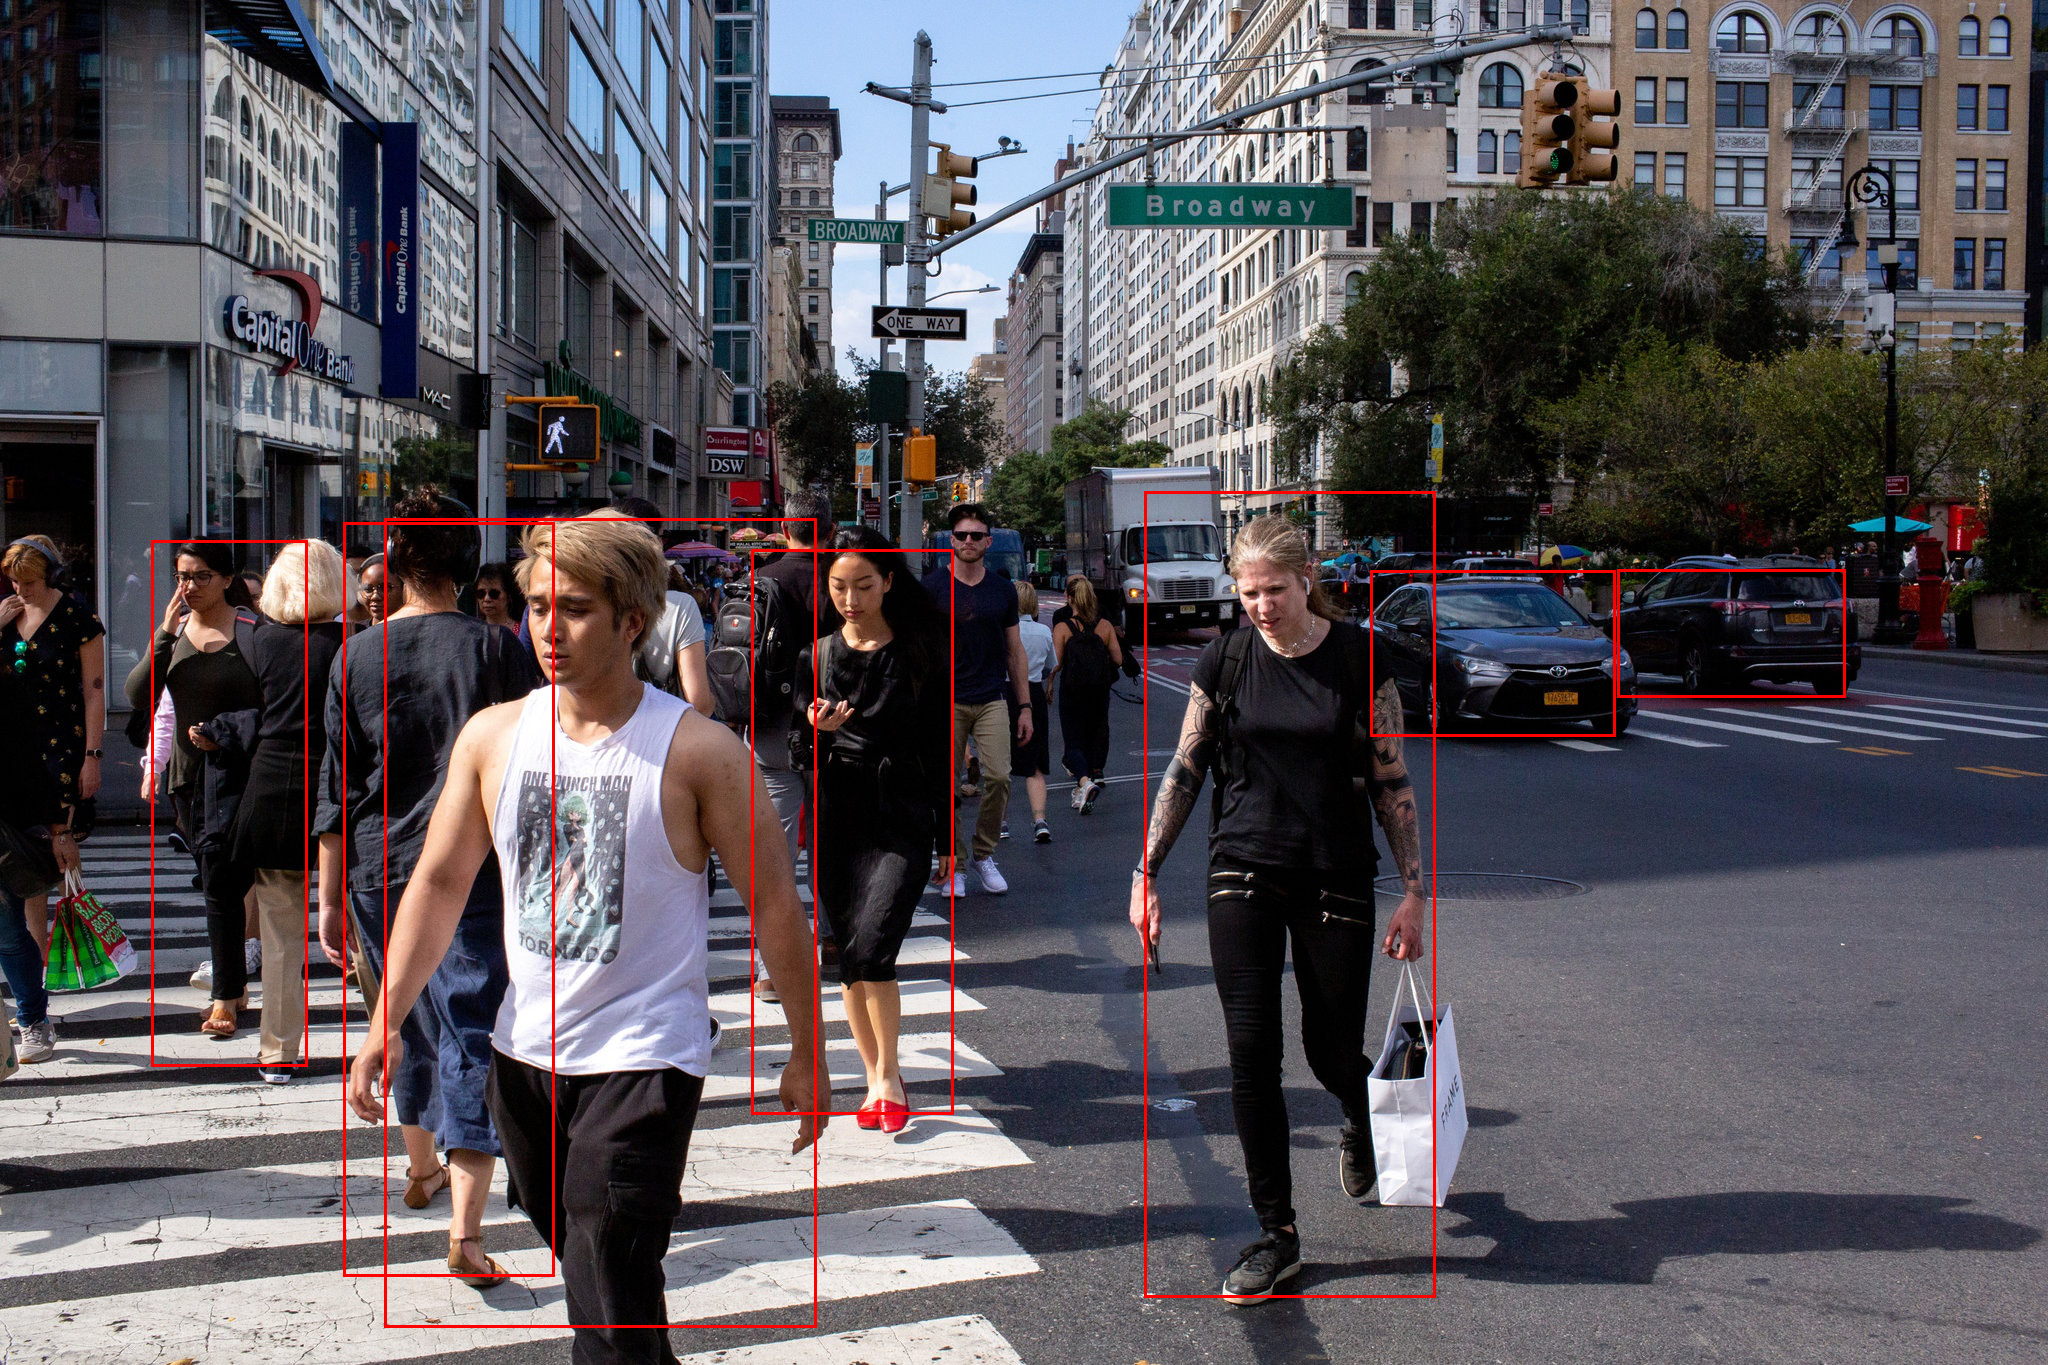

In [36]:
image